### 학과: IT미디어공학과
### 학번: 20191035
### 이름 : 장혜림

## Chap 5. 구매 기록 기반 상품 추천하기

### <Step1. 탐색적 분석> : UK Retail 데이터 분석하기

[1.1] UK Retail 이터 살펴보기

In [ ]:
# 필요한 라이브러리를 임포트한다.
from google.colab import files
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# 영국 선물샵 온라인 도매 거래데이터 업로드하여 df 데이터프레임을 생성한다.
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['online_retail.csv']), 
                 dtype={'InvoiceNo':str, 'CustomerID':str},
                 encoding="ISO-8859-1")

# 업로드 이후에 데이터프레임에서 피처별로 형변환을 할수 있다
# df['CustomerID'] = df['CustomerID'].astype(str)

# df 데이터프레임의 기본정보를 출력한다.        
print(df.info())

Saving online_retail.csv to online_retail.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB
None


In [ ]:
# df 데이터프레임의 상위 5건을 출력한다.
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [ ]:
# 변경된 사항을 확인한다.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB
None


[1.2] 결측 데이터 제거

In [ ]:
# 각 피쳐별로 null값을 합하여 출력한다.

## 각 피쳐별로 null값을 합하여 출력하시오.
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# dropna()으로 결측데이터 행들을 삭제한다.

## df 데이터프레임의 결측데이터 행들을 삭제하시오.
df = df.dropna()

print(df.shape)

(406829, 8)


In [ ]:
# info()로 결측데이터 처리결과를 확인한다.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      406829 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 27.9+ MB
None


-----

[1.3] 탐색 데이터의 조건 필터링

In [ ]:
# 상품수량이 음수인 경우를 제거한다.

## 상품수량이 음수인 행의 수를 출력하시오.
print(df[df['Quantity'] <= 0].shape[0])

## 상품수량이 0 보다 큰 행들만 선택하여 df 데이터프레임에 재저장하시오.
df = df[df['Quantity'] > 0]

8905


In [ ]:
# 상품 가격이 0 이하인 경우를 제거한다.

## 상품 가격이 0 이하인 행의 수를 출력하시오.
print(df[df['UnitPrice'] <= 0].shape[0])


## 상품 가격이 0 보다 큰 행들만 선택하여 df 데이터프레임에 재저장하시오.
df = df[df['UnitPrice'] > 0]

40


In [ ]:
# 상품 코드가 일반적이지 않은 경우(번호가 아닌 경우)를 탐색한다.

## 상품코드에 번호가 아닌 경우 False를 반환하도록 람다함수를 지정하시오.
df['ContainDigit'] = df['StockCode'].apply(lambda x: any(c.isdigit() for c in x))

# 'ContainDigit' 피처의 값이 False 인 행의 수를 출력하시오.
print(df[df['ContainDigit'] == False].shape[0])

## 'ContainDigit' 피처의 값이 False 인 행의 상위 5건을 출력하시오.
df[df['ContainDigit'] == False].head()

1414


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ContainDigit
45,536370,POST,POSTAGE,3,12/1/2010 8:45,18.00,12583,France,False
386,536403,POST,POSTAGE,1,12/1/2010 11:27,15.00,12791,Netherlands,False
1123,536527,POST,POSTAGE,1,12/1/2010 13:04,18.00,12662,Germany,False
2239,536569,M,Manual,1,12/1/2010 15:35,1.25,16274,United Kingdom,False
2250,536569,M,Manual,1,12/1/2010 15:35,18.95,16274,United Kingdom,False


In [ ]:
## 상품 코드가 일반적이지 않은 경우를 제거하시오.
df = df[df['ContainDigit'] == True]

In [ ]:
# info()로 필터링 처리결과를 확인한다.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396470 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   InvoiceNo     396470 non-null  object 
 1   StockCode     396470 non-null  object 
 2   Description   396470 non-null  object 
 3   Quantity      396470 non-null  int64  
 4   InvoiceDate   396470 non-null  object 
 5   UnitPrice     396470 non-null  float64
 6   CustomerID    396470 non-null  object 
 7   Country       396470 non-null  object 
 8   ContainDigit  396470 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 27.6+ MB
None


-----

### [탐색적 데이터 분석]

[1.4] 일자별 거래 데이터 분석

In [ ]:
##  object(문자열)인 'InvoiceDate'의 데이터타입을 날짜형식으로 변환하시오.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%m/%d/%Y %H:%M")

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ContainDigit
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,True
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,True
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,True
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,True
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,True


In [ ]:
## 컬럼 단위의 날짜를 '년-월-일' 형식으로 한꺼번에 추출하시오.
df['date'] = df['InvoiceDate'].dt.date

## 거래 데이터에서 가장 오래된 데이터와 가장 최신의 데이터를 출력하시오.
print(df['date'].min())
print(df['date'].max())

2010-12-01
2011-12-09


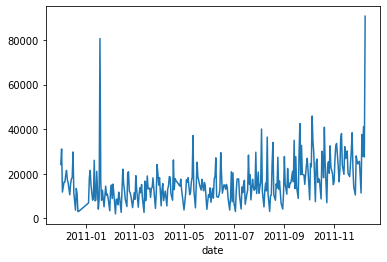

In [ ]:
##  'date'피처를 그룹의 기준으로 하여, 일자별 수량('Quantity')의 합계를 구하시오.
date_quantity_series = df.groupby('date')['Quantity'].sum()

## 일자별 거래량을 시계열 그래프로 그리시오.
date_quantity_series.plot()

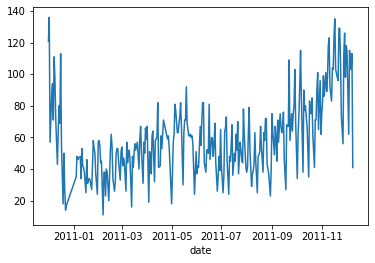

In [ ]:
##  'date'피처를 그룹의 기준으로 하여, 일자별로 거래고유번호('InvoiceNo')의 unique한 갯수를 구하시오.
date_transaction_series = df.groupby('date')['InvoiceNo'].nunique()

# 일자별 거래 횟수를 시계열 그래프로 그린다.
date_transaction_series.plot()

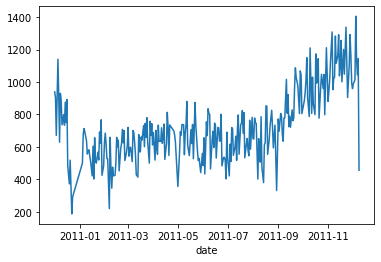

In [ ]:
## 일자별 거래된 상품('StockCode')의 unique한 갯수, 즉 상품 거래 다양성을 구하시오.
date_unique_item_series = df.groupby('date')['StockCode'].nunique() 

# 일자별 거래 상품 개수를 시계열 그래프로 그린다.
date_unique_item_series.plot()

-----

[1.5] 유저별 구매 패턴 분석

In [ ]:
# 총 유저의 수를 계산하여 출력합니다.
print(len(df['CustomerID'].unique()))

print(df['CustomerID'].nunique())

4334
4334


In [ ]:
## 유저별 거래고유번호('InvoiceNo')의 unique한 갯수를 구하시오.
customer_unique_transaction_series = df.groupby('CustomerID')['InvoiceNo'].nunique()

# 유저별 거래 횟수의 통계정보를 확인한다.
customer_unique_transaction_series.describe()

count    4334.000000
mean        4.246654
std         7.642535
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       206.000000
Name: InvoiceNo, dtype: float64

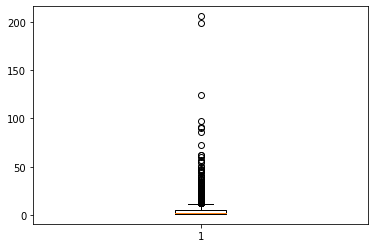

In [ ]:
# 유저별 거래 횟수 시각화한다.
# 유저별 거래 횟수를 상자그래프로 그린다.
plt.boxplot(customer_unique_transaction_series.values)
plt.show()

In [ ]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ContainDigit,date
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,True,2011-12-09
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,True,2011-12-09
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,True,2011-12-09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,True,2011-12-09
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,True,2011-12-09


In [ ]:
## 유저별 상품고유번호('StockCode')의 unique한 갯수를 구하시오.
customer_unique_transaction_series = df.groupby('CustomerID')['StockCode'].nunique()

# 유저별 상품 구매 종류의  개수의 통계정보를 확인한다.
customer_unique_item_series.describe()

count    4334.000000
mean       61.432856
std        85.312937
min         1.000000
25%        16.000000
50%        35.000000
75%        77.000000
max      1786.000000
Name: StockCode, dtype: float64

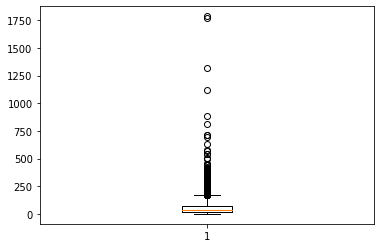

In [ ]:
# 유저별 상품 구매 종류의 개수를 상자그래프로 그린다.
plt.boxplot(customer_unique_item_series.values)
plt.show()

### <Step2. 예측 분석> : SVD를 활용한 상품 구매 예측

[2.1] 추천 대상인 유저와 상품 출력하기

In [ ]:
import datetime

## 2011년 11월 1일을 연말의 기준으로 하여, 기준 이전과 이후로 데이터를 분리하시오.
df_year_round = df[df['date'] < datetime.date(2011, 11, 1)] # 학습 데이터
df_year_end = df[df['date'] >= datetime.date(2011, 11, 1)] # 테스트 데이터

print(df_year_round.shape)
print(df_year_end.shape)

(314902, 10)
(81568, 10)


In [ ]:
# 학습데이터인 11월 이전의 데이터에서 추천 대상인 유저와 상품의 개수를 출력한다.

print(df_year_round['CustomerID'].nunique())

print(df_year_round['StockCode'].nunique())

3970
3608


[2.2] SVD 모델에 사용할 Rating 탐색하기

In [ ]:
## User-Item간의 Rating 데이터 생성 : 유저-상품간 구매 횟수를 데이터프레임으로 생성하시오.
uir_df = df_year_round.groupby(['CustomerID', 'StockCode'])['InvoiceNo'].nunique().reset_index()
uir_df.head()

,CustomerID,StockCode,InvoiceNo
0,12346,23166,1
1,12347,16008,1
2,12347,17021,1
3,12347,20665,1
4,12347,20719,3


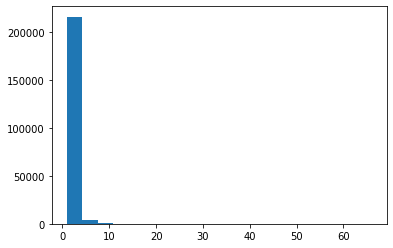

In [ ]:
# Rating 데이터인 (InvoiceNo) 피처의 분포를 탐색한다.
# 대부분 1~5 사이에 위치하지만 왜도(한쪽으로 치우침)가 심하다.
uir_df['InvoiceNo'].hist(bins=20, grid=False)

[2.3] Log Normalization(로그 정규화) 적용하기

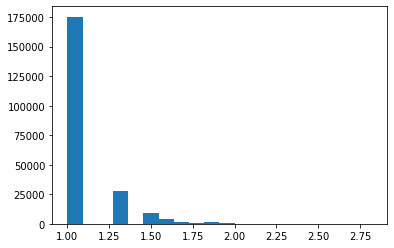

In [ ]:
# Rating(InvoiceNo) 피처를 log normalization를 해준 뒤, 다시 분포를 탐색한다.
# log의 역할은 큰 수를 같은 비율의 작은 수로 바꿔 주는 것이다.
uir_df['InvoiceNo'].apply(lambda x: np.log10(x)+1).hist(bins=20, grid=False)

[2.4] 피처 스케일링 적용하기

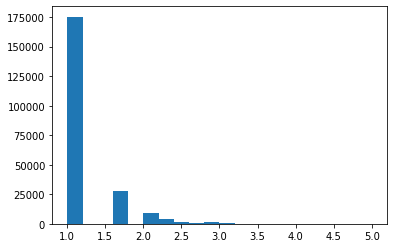

In [ ]:
## Rating(InvoiceNo) 피처를 log normalization를 하시오. 
uir_df['Rating'] = uir_df['InvoiceNo'].apply(lambda x: np.log10(x)+1)

## 최대-최소 스케일링(scaling)을 이용하여 1~5 사이의 점수로 변환하시오.
uir_df['Rating'] = ((uir_df['Rating'] - uir_df['Rating'].min())/
                    (uir_df['Rating'].max() - uir_df['Rating'].min())*4)+1
                   
uir_df['Rating'].hist(bins=20, grid=False)

-----

[2.5] SVD 모델 학습을 위한 데이터셋 생성하기

In [ ]:
# SVD 모델 학습을 위해 전처리된 U-I-R 데이터셋이 생성한다.
uir_df = uir_df[['CustomerID', 'StockCode', 'Rating']]
uir_df.head()

,CustomerID,StockCode,Rating
0,12346,23166,1.000000
1,12347,16008,1.000000
2,12347,17021,1.000000
3,12347,20665,1.000000
4,12347,20719,2.048881


[2.6] SVD 모델 성능 테스트하기

In [ ]:
# SVD를 사용하기 위해 surprise 라이브러리를 설치한다.
!pip install surprise

     |████████████████████████████████| 11.8 MB 5.1 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1619426 sha256=f04ea49e617d783b88699132feca1159007425e17a7407b3e988ac89e3fea555
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
# surprise 라이브러리에서 필요한 클래스들을 임포트한다.
import time
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

In [ ]:
# SVD 모델을 사용하기 위한 학습 데이터를 생성한다. 
reader = Reader(rating_scale=(1, 5))

## SVD 모델을 사용하기 위한 학습 데이터를 생성하시오.
data = Dataset.load_from_df(uir_df[['CustomerID', 'StockCode', 'Rating']], reader)
train_data, test_data = train_test_split(data, test_size=0.2)

# SVD 모델을 훈련데이터로 학습한다.
train_start = time.time()
model = SVD(n_factors=8,
            lr_all=0.005,
            reg_all=0.02,
            n_epochs=200)
model.fit(train_data)
train_end = time.time()
print("training time of model: %.2f seconds" % (train_end - train_start))

## SVD 모델을 테스트 데이터로 예측하시오.
predictions = model.test(test_data)

## 테스트 데이터의 RMSE로 모델의 성능을 평가하시오.
print("RMSE of test dataset in SVD model:")
accuracy.rmse(predictions)

training time of model: 33.32 seconds
RMSE of test dataset in SVD model:
RMSE: 0.3378


0.337822686887932

[2.7] 전체 학습 데이터로 SVD 모델 학습하기

In [ ]:
# 11월 이전 전체를 full trainset으로 활용한다.
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(uir_df[['CustomerID', 'StockCode', 'Rating']], reader)

# 전체 데이터를 학습 데이터로 구축한다.
train_data = data.build_full_trainset()

# SVD 모델을 훈련데이터로 학습한다.
train_start = time.time()
model = SVD(n_factors=8,
            lr_all=0.005,
            reg_all=0.02,
            n_epochs=200)
model.fit(train_data)
train_end = time.time()
print("training time of model: %.2f seconds" % (train_end - train_start))

training time of model: 34.68 seconds
